In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings(action ="ignore")

In [2]:
telco = pd.read_csv("data/telco.csv")

In [3]:
telco.isnull().sum()*100/telco.shape[0]

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [4]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [6]:
le = LabelEncoder()
ohe = OneHotEncoder()

In [7]:
telco.gender = le.fit_transform(telco.gender)

In [8]:
telco.Partner = le.fit_transform(telco.Partner)

In [9]:
telco.Dependents = le.fit_transform(telco.Dependents)

In [10]:
telco.PhoneService = le.fit_transform(telco.PhoneService)

In [11]:
#MultipleLines       

In [12]:
dummy = le.fit_transform(telco.MultipleLines)

In [13]:
dummy = ohe.fit_transform(dummy.reshape(-1,1)).toarray()

In [14]:
dummy[4]

array([1., 0., 0.])

In [15]:
dummy = pd.DataFrame(dummy,columns = ["No_PhoneServices","No_multiplelines","Multiplelines"])

In [16]:
telco["No_PhoneServices"] = dummy["No_PhoneServices"]
telco["No_multiplelines"] = dummy["No_multiplelines"]
telco["Multiplelines"] = dummy["Multiplelines"]

In [17]:
# InternetService     

In [18]:
telco.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [19]:
dummy = le.fit_transform(telco.InternetService)

In [20]:
dummy = ohe.fit_transform(dummy.reshape(-1,1)).toarray()

In [21]:
dummy

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [22]:
dummy = pd.DataFrame(dummy,columns = ["DSL","Fiber_optic","No_internet_services"])

In [23]:
telco["DSL"] = dummy["DSL"]
telco["Fiber_optic"] = dummy["Fiber_optic"]
telco["No_internet_services"] = dummy["No_internet_services"]

In [24]:
# OnlineSecurity      

In [25]:
telco.OnlineSecurity.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [26]:
dummy = le.fit_transform(telco.OnlineSecurity)

In [27]:
dummy = ohe.fit_transform(dummy.reshape(-1,1)).toarray()

In [28]:
dummy

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [29]:
dummy = pd.DataFrame(dummy,columns = ["No","asdad","Yest"])

In [30]:
telco["No_OnlineSecurity"] = dummy["No"]
telco["Yes_OnlineSecurity"] = dummy["Yest"]

In [31]:
#OnlineBackup

In [32]:
telco.OnlineBackup.value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [33]:
dummy = le.fit_transform(telco.OnlineBackup)

In [34]:
dummy = ohe.fit_transform(dummy.reshape(-1,1)).toarray()

In [35]:
dummy = pd.DataFrame(dummy,columns = ["No","asdad","Yes"])

In [36]:
telco["No_OnlineBackup"] = dummy["No"]
telco["Have_OnlineBackup"] = dummy["Yes"]

In [37]:
#DeviceProtection

In [38]:
telco.DeviceProtection.value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [39]:
dummy = le.fit_transform(telco.DeviceProtection)

In [40]:
dummy = ohe.fit_transform(dummy.reshape(-1,1)).toarray()

In [41]:
dummy = pd.DataFrame(dummy,columns = ["No","asdad","Yes"])

In [42]:
telco["No_DeviceProtection"] = dummy["No"]
telco["Have_DeviceProtection"] = dummy["Yes"]

In [43]:
#TechSupport

In [44]:
telco.TechSupport.value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [45]:
dummy = le.fit_transform(telco.TechSupport)

In [46]:
dummy = ohe.fit_transform(dummy.reshape(-1,1)).toarray()

In [47]:
dummy = pd.DataFrame(dummy,columns = ["No","asdad","Yes"])

In [48]:
telco["No_TechSupport"] = dummy["No"]
telco["Have_TechSupport"] = dummy["Yes"]

In [49]:
# StreamingTV

In [50]:
telco.StreamingTV.value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [51]:
dummy = le.fit_transform(telco.StreamingTV)

In [52]:
dummy = ohe.fit_transform(dummy.reshape(-1,1)).toarray()

In [53]:
dummy = pd.DataFrame(dummy,columns = ["No","asdad","Yes"])

In [54]:
telco["No_StreamingTV"] = dummy["No"]
telco["Have_StreamingTV"] = dummy["Yes"]

In [55]:
#StreamingMovies     

In [56]:
telco.StreamingMovies.value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [57]:
dummy = le.fit_transform(telco.StreamingMovies)

In [58]:
dummy = ohe.fit_transform(dummy.reshape(-1,1)).toarray()

In [59]:
dummy = pd.DataFrame(dummy,columns = ["No","asdad","Yes"])

In [60]:
telco["No_StreamingMovies"] = dummy["No"]
telco["Have_StreamingMovies"] = dummy["Yes"]

In [61]:
#Contract

In [62]:
telco.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [63]:
dummy = le.fit_transform(telco.Contract)

In [64]:
dummy = ohe.fit_transform(dummy.reshape(-1,1)).toarray()

In [65]:
dummy

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [66]:
dummy = pd.DataFrame(dummy,columns = ["Month-to-month","One_year","Two_year"])

In [67]:
telco["Month-to-month"] = dummy["Month-to-month"]
telco["One_year"] = dummy["One_year"]
telco["Two_year"] = dummy["Two_year"]

In [68]:
#PaperlessBilling

In [69]:
telco.PaperlessBilling.value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [70]:
telco["PaperlessBilling"] = le.fit_transform(telco.PaperlessBilling)

In [71]:
#PaymentMethod    

In [72]:
telco.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [73]:
dummy = le.fit_transform(telco.PaymentMethod)
dummy = ohe.fit_transform(dummy.reshape(-1,1)).toarray()

dummy = pd.DataFrame(dummy,columns = ["Bank transfer (automatic)","Credit card (automatic)","Electronic check","Mailed check"])

In [74]:
telco["Bank transfer (automatic)"] = dummy["Bank transfer (automatic)"]
telco["Credit card (automatic)"] = dummy["Credit card (automatic)"]
telco["Electronic check"] = dummy["Electronic check"]
telco["Mailed check"] = dummy["Mailed check"]

In [75]:
# Churn

In [76]:
telco["Churn"] = le.fit_transform(telco.Churn)

In [77]:
#Corelation

In [78]:
corr = telco.corr()

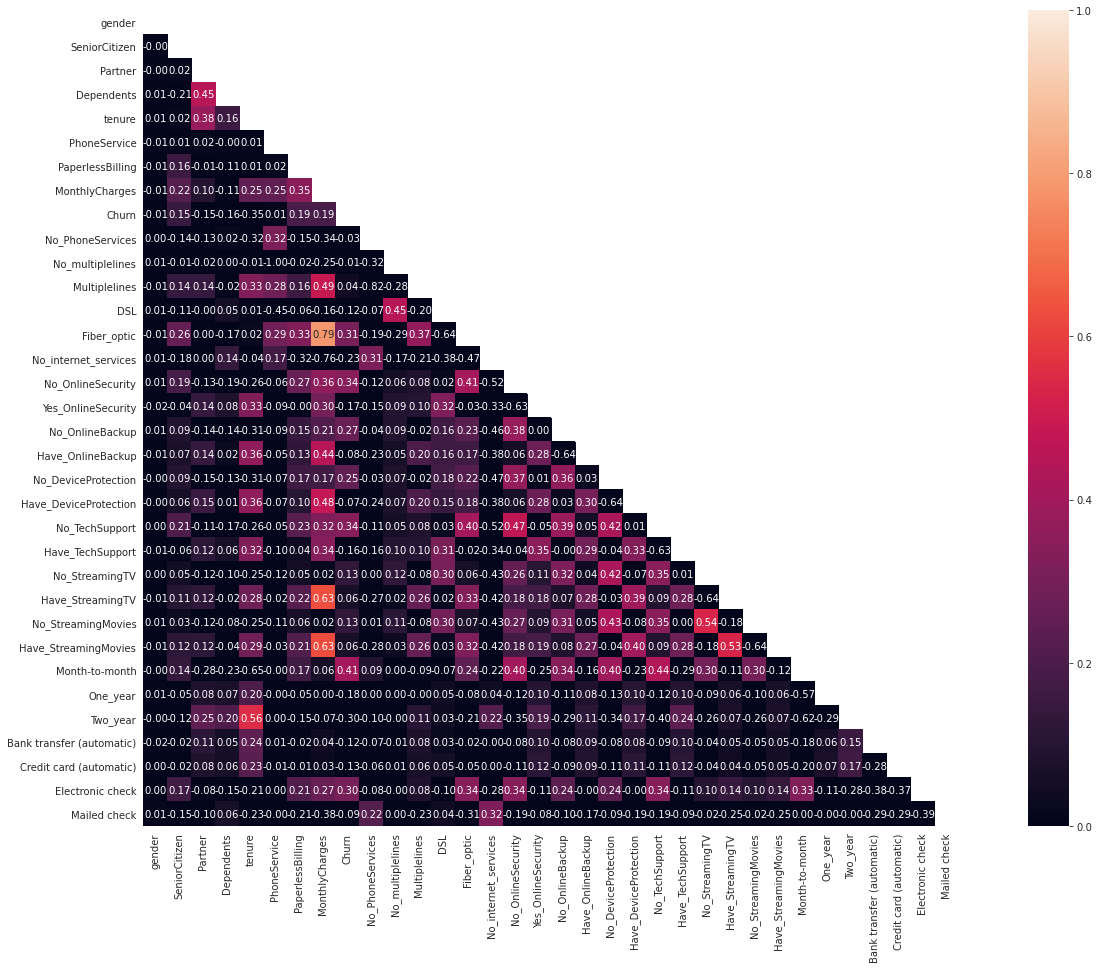

In [79]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(25, 15))
    ax = sns.heatmap(corr, mask=mask, vmin= 0, annot = True, fmt= ".2f",vmax=1, square=True)

In [80]:
# Churn vs Other

In [81]:
chg = telco.groupby(telco.Churn[telco["Month-to-month"] == 1])["Month-to-month"].count()

In [82]:
chg = pd.DataFrame(chg)
chg

,Month-to-month
Churn,
0.0,2220
1.0,1655


In [83]:
oy = telco.groupby(telco.Churn[telco.One_year == 1])["One_year"].count()

In [84]:
oy = pd.DataFrame(oy)
oy

,One_year
Churn,
0.0,1307
1.0,166


In [85]:
ty = telco.groupby(telco.Churn[telco.Two_year == 1])["Two_year"].count()
ty = pd.DataFrame(ty)

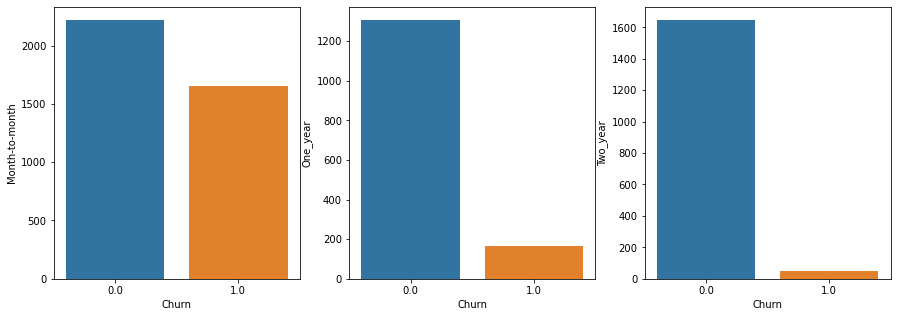

In [86]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.barplot(x= chg.index, y=chg["Month-to-month"])
plt.subplot(132)
sns.barplot(x= oy.index, y=oy["One_year"])
plt.subplot(133)
sns.barplot(x= ty.index, y=ty["Two_year"])
plt.show()

In [87]:
# Month-to-Month better for gain Churns.

In [88]:
df1 = pd.DataFrame(telco.groupby(telco.Churn[telco.Yes_OnlineSecurity == 1])["Yes_OnlineSecurity"].count())
df2 = pd.DataFrame(telco.groupby(telco.Churn[telco.Have_DeviceProtection == 1])["Have_DeviceProtection"].count())
df3 = pd.DataFrame(telco.groupby(telco.Churn[telco.Have_OnlineBackup== 1])["Have_OnlineBackup"].count())
df4 = pd.DataFrame(telco.groupby(telco.Churn[telco.Have_StreamingTV== 1])["Have_StreamingTV"].count())
df5 = pd.DataFrame(telco.groupby(telco.Churn[telco.Have_TechSupport== 1])["Have_TechSupport"].count())

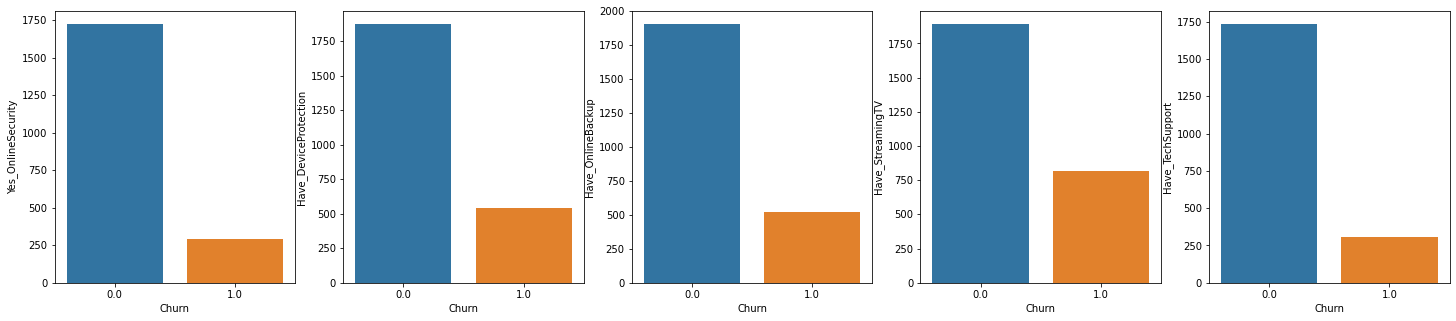

In [89]:
plt.figure(figsize=(25,5))
plt.subplot(151)
sns.barplot(x= df1.index, y=df1["Yes_OnlineSecurity"])
plt.subplot(152)
sns.barplot(x= df2.index, y=df2["Have_DeviceProtection"])
plt.subplot(153)
sns.barplot(x= df3.index, y=df3["Have_OnlineBackup"])
plt.subplot(154)
sns.barplot(x= df4.index, y=df4["Have_StreamingTV"])
plt.subplot(155)
sns.barplot(x= df5.index, y=df5["Have_TechSupport"])
plt.show()

In [90]:
# X and Y

In [91]:
telco.TotalCharges.unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [92]:
telco.TotalCharges[telco.TotalCharges == " "] = np.nan

In [93]:
telco.dropna(inplace=True)


In [94]:
telco.TotalCharges = pd.to_numeric(telco.TotalCharges)

In [95]:
X = telco.select_dtypes(exclude = "object")
X.drop(columns = ["Churn"],inplace= True)
y= telco.Churn

In [96]:
# Train test split

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
# Logistic Regression

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
log_reg = LogisticRegression()

In [102]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [103]:
pred_log_test = log_reg.predict(X_test)
pred_log_train = log_reg.predict(X_train)

In [104]:
from sklearn.metrics import classification_report

In [105]:
print("LOGISTIC REGRESSION RESULTS \n---------------------------------")
print("-------------------TRAIN------------------")
print(classification_report(y_train,pred_log_train))
print("------------------TEST--------------------")
print(classification_report(y_test,pred_log_test))

LOGISTIC REGRESSION RESULTS 
---------------------------------
-------------------TRAIN------------------
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4130
           1       0.66      0.57      0.61      1495

    accuracy                           0.81      5625
   macro avg       0.76      0.73      0.74      5625
weighted avg       0.80      0.81      0.80      5625

------------------TEST--------------------
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.61      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [106]:
#KNN

In [107]:
from sklearn.neighbors import KNeighborsClassifier

In [108]:
knn = KNeighborsClassifier(n_neighbors=25)

In [109]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=25)

In [110]:
pred_knn_test = knn.predict(X_test)
pred_knn_train = knn.predict(X_train)

In [111]:
print("KNN RESULTS \n---------------------------------")
print("-------------------TRAIN------------------")
print(classification_report(y_train,pred_knn_train))
print("------------------TEST--------------------")
print(classification_report(y_test,pred_knn_test))

KNN RESULTS 
---------------------------------
-------------------TRAIN------------------
              precision    recall  f1-score   support

           0       0.82      0.94      0.87      4130
           1       0.70      0.42      0.52      1495

    accuracy                           0.80      5625
   macro avg       0.76      0.68      0.70      5625
weighted avg       0.79      0.80      0.78      5625

------------------TEST--------------------
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1033
           1       0.70      0.38      0.49       374

    accuracy                           0.79      1407
   macro avg       0.75      0.66      0.68      1407
weighted avg       0.78      0.79      0.77      1407



In [112]:
#Decision Tree

In [113]:
from sklearn.tree import DecisionTreeClassifier

In [114]:
dt = DecisionTreeClassifier(max_depth = 4,criterion="entropy")

In [115]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [116]:
pred_dt_test = dt.predict(X_test)
pred_dt_train = dt.predict(X_train)

In [117]:
print("DECISION TREE RESULTS \n---------------------------------")
print("-------------------TRAIN------------------")
print(classification_report(y_train,pred_dt_train))
print("------------------TEST--------------------")
print(classification_report(y_test,pred_dt_test))

DECISION TREE RESULTS 
---------------------------------
-------------------TRAIN------------------
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      4130
           1       0.61      0.66      0.63      1495

    accuracy                           0.80      5625
   macro avg       0.74      0.75      0.75      5625
weighted avg       0.80      0.80      0.80      5625

------------------TEST--------------------
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1033
           1       0.57      0.61      0.59       374

    accuracy                           0.77      1407
   macro avg       0.71      0.72      0.72      1407
weighted avg       0.78      0.77      0.77      1407



In [118]:
#Random Forest

In [119]:
from sklearn.ensemble import RandomForestClassifier

In [120]:
rf = RandomForestClassifier(max_depth=3,n_estimators=20)

In [121]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=20)

In [122]:
pred_rf_test = rf.predict(X_test)
pred_rf_train = rf.predict(X_train)

In [123]:
print("RANDOM FOREST RESULTS \n---------------------------------")
print("-------------------TRAIN------------------")
print(classification_report(y_train,pred_rf_train))
print("------------------TEST--------------------")
print(classification_report(y_test,pred_rf_test))

RANDOM FOREST RESULTS 
---------------------------------
-------------------TRAIN------------------
              precision    recall  f1-score   support

           0       0.79      0.96      0.87      4130
           1       0.73      0.28      0.41      1495

    accuracy                           0.78      5625
   macro avg       0.76      0.62      0.64      5625
weighted avg       0.77      0.78      0.75      5625

------------------TEST--------------------
              precision    recall  f1-score   support

           0       0.79      0.96      0.86      1033
           1       0.72      0.28      0.40       374

    accuracy                           0.78      1407
   macro avg       0.75      0.62      0.63      1407
weighted avg       0.77      0.78      0.74      1407



In [124]:
#XGB

In [125]:
from xgboost import XGBClassifier

In [126]:
xgb = XGBClassifier(max_depth =3,n_estimators = 20,learning_rate = 0.2,min_child_weight = 7)

In [127]:
X_train.T

,6030,3410,5483,5524,6337,5284,1327,6741,5931,6766,...,5343,466,6274,5743,3097,3778,5199,5235,5399,862
gender,0.00,1.0,0.00,1.00,0.0,0.0,1.0,0.0,1.00,1.00,...,0.00,1.00,1.00,0.0,1.0,1.00,0.00,1.00,0.00,1.00
SeniorCitizen,0.00,0.0,0.00,0.00,0.0,1.0,0.0,0.0,1.00,0.00,...,0.00,1.00,0.00,1.0,0.0,0.00,0.00,0.00,0.00,1.00
Partner,0.00,0.0,1.00,1.00,1.0,0.0,1.0,0.0,1.00,1.00,...,1.00,1.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,1.00
Dependents,0.00,0.0,0.00,1.00,1.0,0.0,0.0,0.0,0.00,1.00,...,0.00,0.00,0.00,0.0,1.0,0.00,0.00,0.00,0.00,0.00
tenure,43.00,3.0,55.00,45.00,55.0,5.0,59.0,12.0,13.00,14.00,...,52.00,64.00,57.00,38.0,2.0,3.00,51.00,9.00,50.00,20.00
PhoneService,0.00,1.0,1.00,1.00,1.0,0.0,1.0,1.0,1.00,1.00,...,0.00,1.00,1.00,1.0,1.0,1.00,1.00,1.00,1.00,1.00
PaperlessBilling,1.00,0.0,1.00,0.00,0.0,0.0,1.0,1.0,1.00,0.00,...,0.00,0.00,1.00,0.0,0.0,0.00,1.00,1.00,0.00,1.00
MonthlyCharges,49.05,53.4,77.75,54.65,100.9,45.7,99.5,96.0,98.00,19.75,...,66.25,102.10,86.90,20.2,20.4,50.40,111.50,81.15,19.75,73.65
TotalCharges,2076.20,188.7,4458.15,2553.70,5448.6,198.0,5961.1,1062.1,1237.85,309.35,...,3330.10,6538.45,4939.25,735.9,42.9,137.25,5703.25,784.45,989.05,1463.50
No_PhoneServices,0.00,1.0,0.00,1.00,0.0,0.0,0.0,1.0,1.00,1.00,...,0.00,0.00,0.00,1.0,1.0,0.00,0.00,0.00,1.00,1.00


In [128]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [129]:
pred_xgb_test = xgb.predict(X_test)
pred_xgb_train = xgb.predict(X_train)

In [130]:
print("XGB RESULTS \n---------------------------------")
print("-------------------TRAIN------------------")
print(classification_report(y_train,pred_xgb_train))
print("------------------TEST--------------------")
print(classification_report(y_test,pred_xgb_test))

XGB RESULTS 
---------------------------------
-------------------TRAIN------------------
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4130
           1       0.70      0.55      0.61      1495

    accuracy                           0.82      5625
   macro avg       0.77      0.73      0.75      5625
weighted avg       0.81      0.82      0.81      5625

------------------TEST--------------------
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.47      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



In [131]:
# ANN

In [132]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.utils import to_categorical

In [133]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [134]:
ann = Sequential()
ann.add(Dense(64,activation = "tanh",input_shape=(X_train.shape[1],)))
ann.add(Dropout(0.3))
ann.add(Dense(32,activation = "relu"))
ann.add(Dense(16,activation ="sigmoid"))
ann.add(Dense(y_train_cat.shape[1],activation ="softmax"))
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                2240      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 34        
Total params: 4,882
Trainable params: 4,882
Non-trainable params: 0
_________________________________________________________________


In [135]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [136]:
ann.evaluate(X_test,y_test_cat,batch_size = 64,verbose = 0)[1]

0.7341862320899963

In [137]:
ann.evaluate(X_train,y_train_cat,batch_size = 64,verbose = 0)[1]

0.7342222332954407

In [138]:
prediction_prob=ann.predict(X_test)

In [139]:
predictions = np.argmax(prediction_prob,axis=1)

In [140]:
from sklearn.metrics import confusion_matrix

In [141]:
hm = confusion_matrix(y_test,predictions)

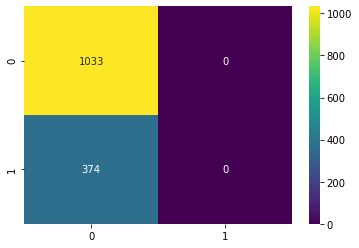

In [142]:
sns.heatmap(pd.DataFrame(hm),annot=True, cmap = "viridis",fmt=".0f")
plt.show()

In [143]:
prediction_prob=ann.predict(X_train)

In [144]:
predictions = np.argmax(prediction_prob,axis=1)

In [145]:
hm = confusion_matrix(y_train,predictions)

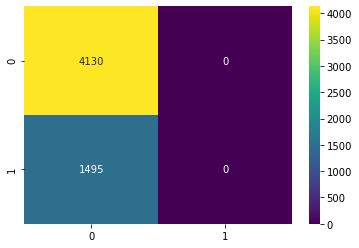

In [146]:
sns.heatmap(pd.DataFrame(hm),annot=True, cmap = "viridis",fmt=".0f")
plt.show()

In [147]:
#Joblib

In [148]:
import joblib

In [149]:
joblib.dump(ann,"ann.joblib")

TypeError: cannot pickle '_thread.RLock' object

In [150]:
joblib.dump(xgb,"xgb.joblib")

['xgb.joblib']

In [151]:
rf
joblib.dump(rf,"rf.joblib")

['rf.joblib']

In [152]:
dt
joblib.dump(dt,"dt.joblib")

['dt.joblib']

In [153]:
knn
joblib.dump(knn,"knn.joblib")

['knn.joblib']

In [154]:
log_reg
joblib.dump(log_reg,"log_reg.joblib")

['log_reg.joblib']